## Computer Vision Multi-class Classification with TensorFlow

Going through those same steps, this time will work with 10 different types of food.

1. Become one with the data 
2. Preprocess the data 
3. Create a model 
4. Fit the model
5. Evaluate the model
6. Adjust different parameters and improve model 
7. Repeat until get desired result

### 1. Import and become one with the data


In [1]:
import zipfile

zip_ref = zipfile.ZipFile("10_food_classes_all_data.zip", "r")
zip_ref.extractall()
zip_ref.close()

In [70]:
import os

for dirpath, dirnames, filenames in os.walk("10_food_classes_all_data"):
  print(f"There are {len(dirnames)} directories and {len(filenames)} images in '{dirpath}'.")

There are 2 directories and 0 images in '10_food_classes_all_data'.
There are 10 directories and 0 images in '10_food_classes_all_data/test'.
There are 0 directories and 250 images in '10_food_classes_all_data/test/chicken_wings'.
There are 0 directories and 250 images in '10_food_classes_all_data/test/fried_rice'.
There are 0 directories and 250 images in '10_food_classes_all_data/test/ice_cream'.
There are 0 directories and 250 images in '10_food_classes_all_data/test/grilled_salmon'.
There are 0 directories and 250 images in '10_food_classes_all_data/test/chicken_curry'.
There are 0 directories and 250 images in '10_food_classes_all_data/test/hamburger'.
There are 0 directories and 250 images in '10_food_classes_all_data/test/steak'.
There are 0 directories and 250 images in '10_food_classes_all_data/test/pizza'.
There are 0 directories and 250 images in '10_food_classes_all_data/test/sushi'.
There are 0 directories and 250 images in '10_food_classes_all_data/test/ramen'.
There are 

In [71]:
train_dir = "10_food_classes_all_data/train/"
test_dir = "10_food_classes_all_data/test/"

In [72]:
import pathlib
import numpy as np
data_dir = pathlib.Path(train_dir)
class_names = np.array(sorted([item.name for item in data_dir.glob('*')]))
print(class_names)

['chicken_curry' 'chicken_wings' 'fried_rice' 'grilled_salmon' 'hamburger'
 'ice_cream' 'pizza' 'ramen' 'steak' 'sushi']


In [ ]:
# View an image
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import random

def view_random_image(target_dir, target_class):
  target_folder = target_dir+target_class

  random_image = random.sample(os.listdir(target_folder), 1)

  img = mpimg.imread(target_folder + "/" + random_image[0])
  plt.imshow(img)
  plt.title(target_class)
  plt.axis("off");

  print(f"Image shape: {img.shape}") 
  
  return img

Image shape: (512, 384, 3)


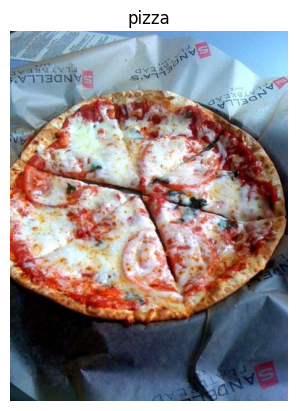

In [73]:
import random
img = view_random_image(target_dir=train_dir,
                        target_class=random.choice(class_names))

### 2. Preprocess the data (prepare it for a model)


In [74]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Rescale the data and create data generator instances
train_datagen = ImageDataGenerator(rescale=1/255.)
test_datagen = ImageDataGenerator(rescale=1/255.)

# Load data in from directories and turn it into batches
train_data = train_datagen.flow_from_directory(train_dir,
                                               target_size=(224, 224),
                                               batch_size=32,
                                               class_mode='categorical') # changed to categorical

test_data = train_datagen.flow_from_directory(test_dir,
                                              target_size=(224, 224),
                                              batch_size=32,
                                              class_mode='categorical')

Found 7500 images belonging to 10 classes.
Found 2500 images belonging to 10 classes.


### 3. Create a model (start with a baseline)

* Changing the output layer to use have 10 ouput neurons (the same number as the number of classes we have).
* Changing the output layer to use `'softmax'` activation instead of `'sigmoid'` activation.
* Changing the loss function to be `'categorical_crossentropy'` instead of `'binary_crossentropy'`.

In [75]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPool2D, Flatten, Dense

model_9 = Sequential([
  Conv2D(10, 3, activation='relu', input_shape=(224, 224, 3)),
  Conv2D(10, 3, activation='relu'),
  MaxPool2D(),
  Conv2D(10, 3, activation='relu'),
  Conv2D(10, 3, activation='relu'),
  MaxPool2D(),
  Flatten(),
  Dense(10, activation='softmax') # changed to have 10 neurons (same as number of classes) and 'softmax' activation
])

model_9.compile(loss="categorical_crossentropy", # changed to categorical_crossentropy
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["accuracy"])

### 4. Fit a model


In [76]:
# Fit the model
history_9 = model_9.fit(train_data, # now 10 different classes 
                        epochs=5,
                        steps_per_epoch=len(train_data),
                        validation_data=test_data,
                        validation_steps=len(test_data))

Epoch 1/5
235/235 [==============================] - 48s 194ms/step - loss: 2.1520 - accuracy: 0.2133 - val_loss: 1.9674 - val_accuracy: 0.2964
Epoch 2/5
235/235 [==============================] - 45s 193ms/step - loss: 1.8770 - accuracy: 0.3489 - val_loss: 1.8792 - val_accuracy: 0.3424
Epoch 3/5
235/235 [==============================] - 45s 190ms/step - loss: 1.5239 - accuracy: 0.4860 - val_loss: 1.9865 - val_accuracy: 0.3184
Epoch 4/5
235/235 [==============================] - 45s 193ms/step - loss: 0.9507 - accuracy: 0.6897 - val_loss: 2.4049 - val_accuracy: 0.2824
Epoch 5/5
235/235 [==============================] - 45s 190ms/step - loss: 0.3835 - accuracy: 0.8772 - val_loss: 3.6373 - val_accuracy: 0.2760


### 5. Evaluate the model


In [77]:
# Evaluate on the test data
model_9.evaluate(test_data)

79/79 [==============================] - 11s 139ms/step - loss: 3.6373 - accuracy: 0.2760


[3.6373109817504883, 0.2759999930858612]

In [ ]:
def plot_loss_curves(history):
 
  loss = history.history['loss']
  val_loss = history.history['val_loss']

  accuracy = history.history['accuracy']
  val_accuracy = history.history['val_accuracy']

  epochs = range(len(history.history['loss']))

  # Plot loss
  plt.plot(epochs, loss, label='training_loss')
  plt.plot(epochs, val_loss, label='val_loss')
  plt.title('Loss')
  plt.xlabel('Epochs')
  plt.legend()

  # Plot accuracy
  plt.figure()
  plt.plot(epochs, accuracy, label='training_accuracy')
  plt.plot(epochs, val_accuracy, label='val_accuracy')
  plt.title('Accuracy')
  plt.xlabel('Epochs')
  plt.legend();

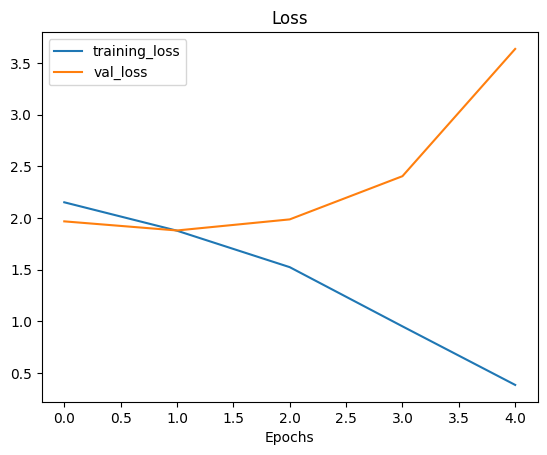

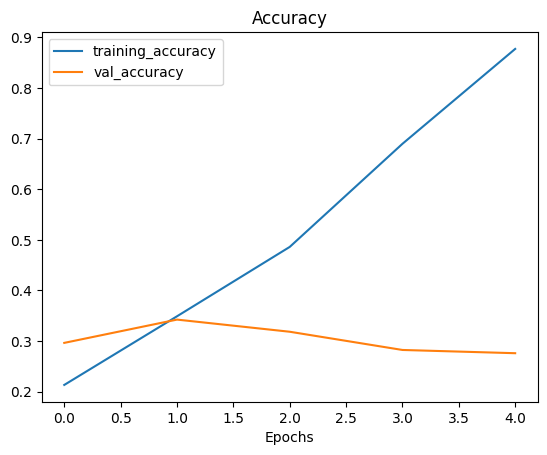

In [78]:
plot_loss_curves(history_9)

Seems our model is **overfitting** the training set. In other words, it's getting great results on the training data but performs poorly on the test data.

### 6. Adjust the model parameters


So Next steps will be to try and prevent our model overfitting. A couple of ways to prevent overfitting include:

- **Get more data** - Having more data gives the model more opportunities to learn patterns, patterns which may be more generalizable to new examples.
- **Simplify model** - If the current model is already overfitting the training data, it may be too complicated of a model. This means it's learning the patterns of the data too well and isn't able to generalize well to unseen data. One way to simplify a model is to reduce the number of layers it uses or to reduce the number of hidden units in each layer.
- **Use data augmentation** - Data augmentation manipulates the training data in a way so that's harder for the model to learn as it artificially adds more variety to the data. If a model is able to learn patterns in augmented data, the model may be able to generalize better to unseen data.
- **Use transfer learning** - Transfer learning involves leverages the patterns (also called pretrained weights) one model has learned to use as the foundation for your own task. In our case, we could use one computer vision model pretrained on a large variety of images and then tweak it slightly to be more specialized for food images.

Preventing overfitting is also referred to as **regularization**.

First simplify our model.

To do so, we'll remove two of the convolutional layers, taking the total number of convolutional layers from four to two.

In [79]:
# simplified model 
model_10 = Sequential([
  Conv2D(10, 3, activation='relu', input_shape=(224, 224, 3)),
  MaxPool2D(),
  Conv2D(10, 3, activation='relu'),
  MaxPool2D(),
  Flatten(),
  Dense(10, activation='softmax')
])

model_10.compile(loss='categorical_crossentropy',
                 optimizer=tf.keras.optimizers.Adam(),
                 metrics=['accuracy'])

history_10 = model_10.fit(train_data,
                          epochs=5,
                          steps_per_epoch=len(train_data),
                          validation_data=test_data,
                          validation_steps=len(test_data))

Epoch 1/5
235/235 [==============================] - 46s 193ms/step - loss: 2.2804 - accuracy: 0.2397 - val_loss: 1.9445 - val_accuracy: 0.3024
Epoch 2/5
235/235 [==============================] - 45s 192ms/step - loss: 1.8253 - accuracy: 0.3785 - val_loss: 1.9529 - val_accuracy: 0.3172
Epoch 3/5
235/235 [==============================] - 44s 186ms/step - loss: 1.5193 - accuracy: 0.4979 - val_loss: 2.0705 - val_accuracy: 0.3160
Epoch 4/5
235/235 [==============================] - 44s 187ms/step - loss: 1.1143 - accuracy: 0.6408 - val_loss: 2.2653 - val_accuracy: 0.3064
Epoch 5/5
235/235 [==============================] - 44s 188ms/step - loss: 0.7340 - accuracy: 0.7787 - val_loss: 2.5814 - val_accuracy: 0.2944


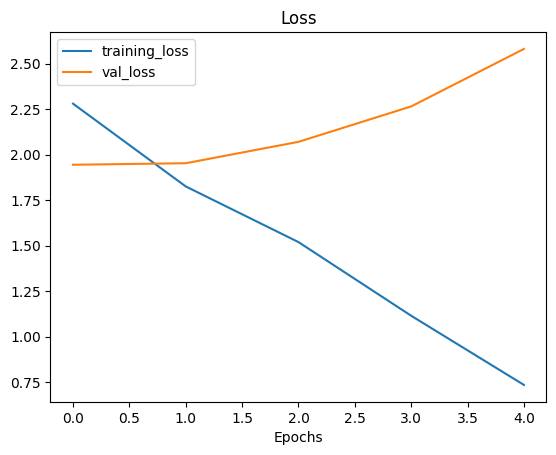

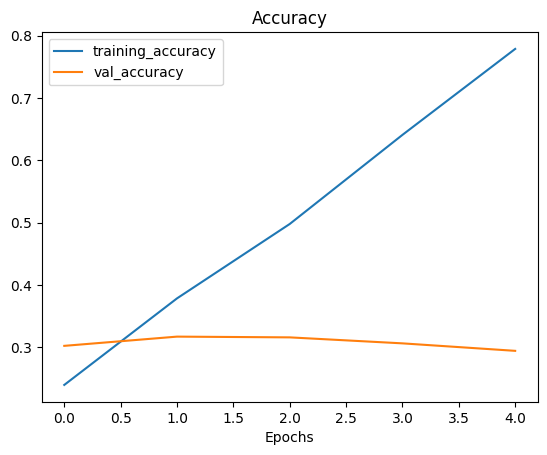

In [80]:
plot_loss_curves(history_10)

Even with a simplifed model, it looks like model is still dramatically overfitting the training data.

Try **data augmentation**

In [81]:
train_datagen_augmented = ImageDataGenerator(rescale=1/255.,
                                             rotation_range=20, # this is an int not a float
                                             width_shift_range=0.2,
                                             height_shift_range=0.2,
                                             zoom_range=0.2,
                                             horizontal_flip=True)

train_data_augmented = train_datagen_augmented.flow_from_directory(train_dir,
                                                                  target_size=(224, 224),
                                                                  batch_size=32,
                                                                  class_mode='categorical')

Found 7500 images belonging to 10 classes.


Rather than rewrite the model from scratch, we can clone it using a handy function in TensorFlow called [`clone_model`].


In [82]:
# Clone the model (use the same architecture)
model_11 = tf.keras.models.clone_model(model_10)

# Compile the cloned model 
model_11.compile(loss="categorical_crossentropy",
              optimizer=tf.keras.optimizers.Adam(),
              metrics=["accuracy"])

# Fit the model
history_11 = model_11.fit(train_data_augmented,
                          epochs=5,
                          steps_per_epoch=len(train_data_augmented),
                          validation_data=test_data,
                          validation_steps=len(test_data))

Epoch 1/5
235/235 [==============================] - 112s 473ms/step - loss: 2.1903 - accuracy: 0.1997 - val_loss: 2.0500 - val_accuracy: 0.2668
Epoch 2/5
235/235 [==============================] - 114s 483ms/step - loss: 2.0740 - accuracy: 0.2592 - val_loss: 1.9318 - val_accuracy: 0.3236
Epoch 3/5
235/235 [==============================] - 114s 485ms/step - loss: 2.0149 - accuracy: 0.3044 - val_loss: 1.8862 - val_accuracy: 0.3348
Epoch 4/5
235/235 [==============================] - 114s 487ms/step - loss: 1.9739 - accuracy: 0.3172 - val_loss: 1.8206 - val_accuracy: 0.3868
Epoch 5/5
235/235 [==============================] - 115s 489ms/step - loss: 1.9415 - accuracy: 0.3292 - val_loss: 1.8619 - val_accuracy: 0.3696


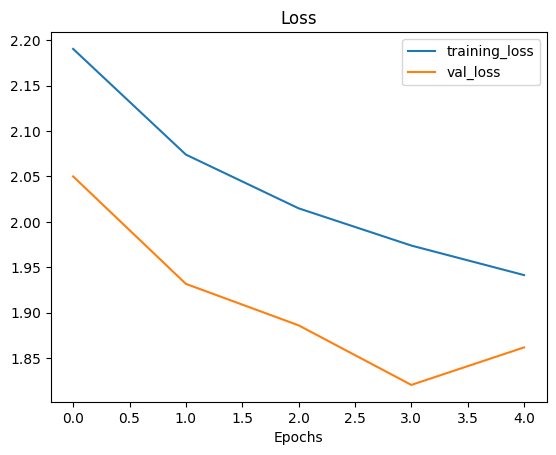

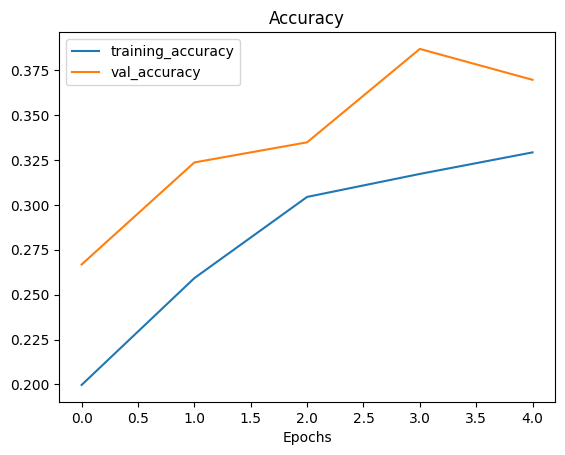

In [83]:
plot_loss_curves(history_11)

The loss curves are much closer to eachother. Although model didn't perform as well on the augmented training set, it performed much better on the validation dataset.



### 7. Repeat until get desired result


In [84]:
class_names

array(['chicken_curry', 'chicken_wings', 'fried_rice', 'grilled_salmon',
       'hamburger', 'ice_cream', 'pizza', 'ramen', 'steak', 'sushi'],
      dtype='<U14')

In [ ]:
def pred_and_plot(model, filename, class_names):
  
  img = load_and_prep_image(filename)

  pred = model.predict(tf.expand_dims(img, axis=0))

  pred_class = class_names[int(tf.round(pred)[0][0])]

  plt.imshow(img)
  plt.title(f"Prediction: {pred_class}")
  plt.axis(False);

1/1 [==============================] - 0s 81ms/step


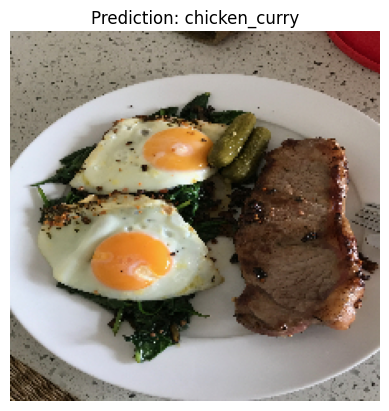

In [86]:
pred_and_plot(model=model_11, 
              filename="03-steak.jpeg", 
              class_names=class_names)

Prediction wrong, try another

1/1 [==============================] - 0s 23ms/step


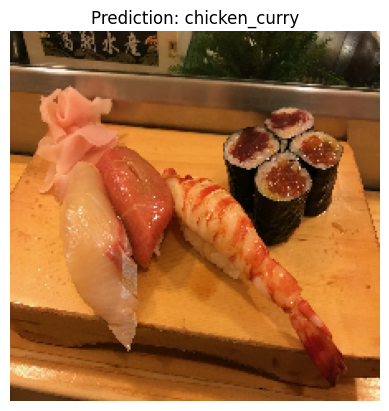

In [87]:
pred_and_plot(model_11, "03-sushi.jpeg", class_names)

1/1 [==============================] - 0s 22ms/step


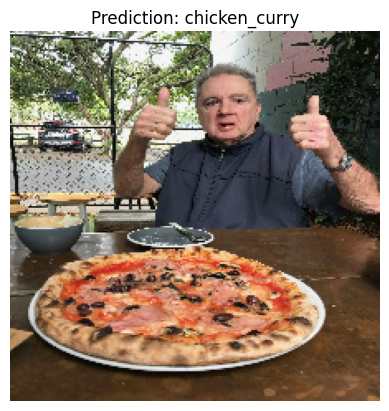

In [88]:
pred_and_plot(model_11, "03-pizza-dad.jpeg", class_names)

In [ ]:
def load_and_prep_image(filename, img_shape=224):
  
  img = tf.io.read_file(filename)

  img = tf.image.decode_image(img, channels=3)

  img = tf.image.resize(img, size = [img_shape, img_shape])

  img = img/255.
  return img

1/1 [==============================] - 0s 22ms/step


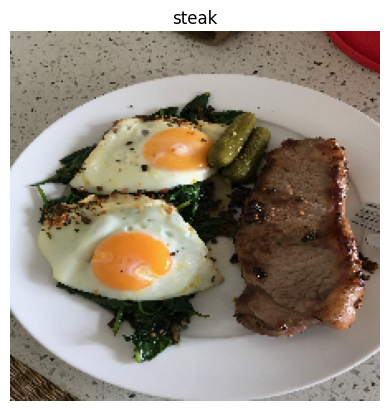

In [89]:
img = load_and_prep_image("03-steak.jpeg")

pred = model_11.predict(tf.expand_dims(img, axis=0))

pred_class = class_names[pred.argmax()]
plt.imshow(img)
plt.title(pred_class)
plt.axis(False);

Something up with our `pred_and_plot` function.

This `pred_and_plot` function was designed to be used with binary classification models where as current model is a multi-class classification model.

The main difference lies in the output of the `predict` function.

In [90]:
pred = model_11.predict(tf.expand_dims(img, axis=0))
pred

1/1 [==============================] - 0s 22ms/step


array([[0.00413127, 0.00698275, 0.00470221, 0.14550138, 0.0163848 ,
        0.00341261, 0.00258247, 0.2162087 , 0.5952408 , 0.00485306]],
      dtype=float32)

Since model has a `'softmax'` activation function and 10 output neurons, it outputs a prediction probability for each of the classes in model.

We can find the maximum value index using [`argmax`] and then use that to index `class_names` list to output the predicted class.

In [91]:
# Find the predicted class name
class_names[pred.argmax()]

'steak'

Readjust `pred_and_plot` function.

In [92]:
# Adjust function to work with multi-class
def pred_and_plot(model, filename, class_names):
  
  img = load_and_prep_image(filename)

  pred = model.predict(tf.expand_dims(img, axis=0))

  if len(pred[0]) > 1: 
    pred_class = class_names[pred.argmax()] 
  else:
    pred_class = class_names[int(tf.round(pred)[0][0])] 

  plt.imshow(img)
  plt.title(f"Prediction: {pred_class}")
  plt.axis(False);

1/1 [==============================] - 0s 23ms/step


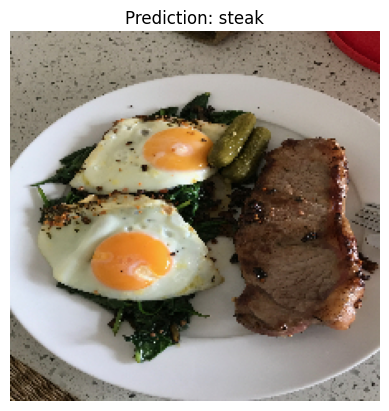

In [93]:
pred_and_plot(model_11, "03-steak.jpeg", class_names)

1/1 [==============================] - 0s 22ms/step


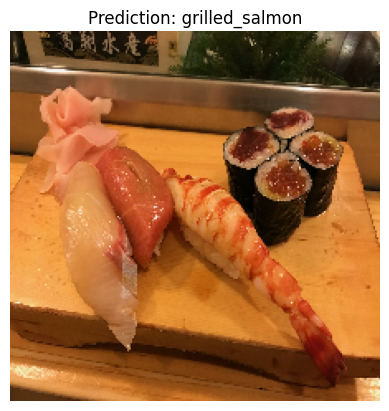

In [94]:
pred_and_plot(model_11, "03-sushi.jpeg", class_names)

1/1 [==============================] - 0s 22ms/step


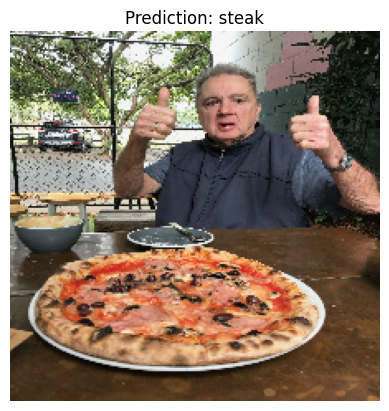

In [95]:
pred_and_plot(model_11, "03-pizza-dad.jpeg", class_names)

1/1 [==============================] - 0s 22ms/step


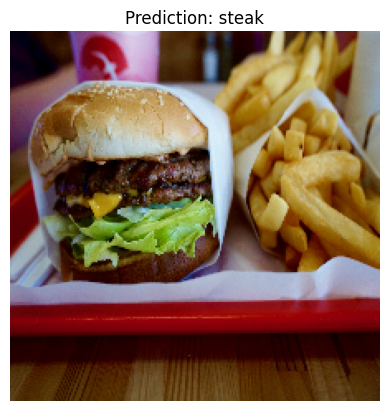

In [96]:
pred_and_plot(model_11, "03-hamburger.jpeg", class_names)

Model's predictions not very good, this is because it's only performing at 35% accuracy on the test dataset.

We can improve this using transfer learning.

## Saving and loading model

In [97]:
model_11.save("saved_trained_model")

In [98]:
loaded_model_11 = tf.keras.models.load_model("saved_trained_model")
loaded_model_11.evaluate(test_data)

79/79 [==============================] - 11s 141ms/step - loss: 1.8619 - accuracy: 0.3696


[1.8618727922439575, 0.36959999799728394]

In [99]:
model_11.evaluate(test_data)

79/79 [==============================] - 11s 140ms/step - loss: 1.8619 - accuracy: 0.3696


[1.8618724346160889, 0.36959999799728394]